<a href="https://colab.research.google.com/github/Rachev2002/eda_and_dev_tools/blob/pipeline/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B8_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D1%80%D0%B5%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
# Чтение файла CSV
df = pd.read_csv('https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/online_shoppers_intention.csv', sep=',')

In [3]:
# Выведем первые 5 значений
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Предобработка

In [4]:
df.drop_duplicates(inplace=True)

df.shape

(12221, 18)

In [5]:
df['Month'] = df['Month'].replace('aug', 'Aug')

In [6]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['months'] = pd.Categorical(df['Month'], categories=months, ordered=True)

In [7]:
ExitRates_median = df['ExitRates'].median()

df['ExitRates'] = df['ExitRates'].fillna(ExitRates_median)

In [8]:
ProductRelated_Duration_median = df['ProductRelated_Duration'].median()

df['ProductRelated_Duration'] = df['ProductRelated_Duration'].fillna(ProductRelated_Duration_median)

In [9]:
Informational_Duration_median = df['Informational_Duration'].median()

df['Informational_Duration'] = df['Informational_Duration'].fillna(Informational_Duration_median)

In [10]:
df = df.drop('Month', axis=1)

#  1.Построение моделей на числовых признаках (минимум - NB и kNN, максимум - любые) с параметрами по умолчанию, вычисление метрик + комментарий о качестве моделей (1 балл).

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12221 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12221 non-null  int64   
 1   Administrative_Duration  12221 non-null  float64 
 2   Informational            12221 non-null  int64   
 3   Informational_Duration   12221 non-null  float64 
 4   ProductRelated           12221 non-null  int64   
 5   ProductRelated_Duration  12221 non-null  float64 
 6   BounceRates              12221 non-null  float64 
 7   ExitRates                12221 non-null  float64 
 8   PageValues               12221 non-null  float64 
 9   SpecialDay               12221 non-null  float64 
 10  OperatingSystems         12221 non-null  int64   
 11  Browser                  12221 non-null  int64   
 12  Region                   12221 non-null  int64   
 13  TrafficType              12221 non-null  int64   
 14  Visito

In [12]:
df_num = df.select_dtypes(exclude=['bool','object', 'category']) # выберем только столбцы с числовыми данными

In [13]:
y = df['Revenue'] # Целевая переменная

In [14]:
df_num.info() # Проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12221 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12221 non-null  int64  
 1   Administrative_Duration  12221 non-null  float64
 2   Informational            12221 non-null  int64  
 3   Informational_Duration   12221 non-null  float64
 4   ProductRelated           12221 non-null  int64  
 5   ProductRelated_Duration  12221 non-null  float64
 6   BounceRates              12221 non-null  float64
 7   ExitRates                12221 non-null  float64
 8   PageValues               12221 non-null  float64
 9   SpecialDay               12221 non-null  float64
 10  OperatingSystems         12221 non-null  int64  
 11  Browser                  12221 non-null  int64  
 12  Region                   12221 non-null  int64  
 13  TrafficType              12221 non-null  int64  
dtypes: float64(7), int64(7

Разобъём наши данные на тренировочную и тестовую выборку

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_num, y, test_size=0.25, random_state=42)

Используем для предсказания наивный байсовский классификатор. (С параметрами по умолчанию)

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

Вычислим метрики. Accuracy даёт 0.85, остальные метрики 0.51. Базовая модель наивный байсовский классификатор готова. Дальше будем пытаться улучшать качество метрик

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# print('GausianNB')
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.849476439790576
0.5138004246284501
0.5116279069767442
0.5127118644067797


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[2354,  229],
       [ 231,  242]])

Ещё попробуем модель KNN.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_cl = KNeighborsClassifier()

knn_cl.fit(X_train, y_train)

pred_knn = knn_cl.predict(X_test)

У модели KNN accuracy = 0.86, precision = 0.59, что лучше чем у байса модели, но recall и f1_score намного ниже.

In [20]:
print(accuracy_score(y_test, pred_knn))
print(precision_score(y_test, pred_knn))
print(recall_score(y_test, pred_knn))
print(f1_score(y_test, pred_knn))

0.8596204188481675
0.5932203389830508
0.2959830866807611
0.39492242595204513


Модель KNN подошла лучше, если бы нам важно более точно предсказывать тех людей, которые покупку не совершат. (Revenue)

In [21]:
df.Revenue.value_counts()

False    10313
True      1908
Name: Revenue, dtype: int64

In [22]:
confusion_matrix(y_test, pred_knn)

array([[2487,   96],
       [ 333,  140]])

Возьму Градиентный бустинг CatBoost

In [23]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.2 MB/s eta 0:00:00


In [24]:
from catboost import CatBoostClassifier

In [25]:
# Инициализация и обучение модели CatBoost
model = CatBoostClassifier()

model.fit(X_train, y_train)

pred_CBC = model.predict(X_test)

Learning rate set to 0.026532
0:	learn: 0.6617191	total: 99.4ms	remaining: 1m 39s
1:	learn: 0.6342578	total: 141ms	remaining: 1m 10s
2:	learn: 0.6076427	total: 186ms	remaining: 1m 1s
3:	learn: 0.5818074	total: 250ms	remaining: 1m 2s
4:	learn: 0.5555996	total: 286ms	remaining: 57s
5:	learn: 0.5372146	total: 308ms	remaining: 51s
6:	learn: 0.5160193	total: 332ms	remaining: 47.2s
7:	learn: 0.4962719	total: 356ms	remaining: 44.1s
8:	learn: 0.4806915	total: 374ms	remaining: 41.2s
9:	learn: 0.4656074	total: 393ms	remaining: 38.9s
10:	learn: 0.4515516	total: 414ms	remaining: 37.2s
11:	learn: 0.4372109	total: 436ms	remaining: 35.9s
12:	learn: 0.4248164	total: 456ms	remaining: 34.6s
13:	learn: 0.4124169	total: 466ms	remaining: 32.8s
14:	learn: 0.4022020	total: 489ms	remaining: 32.1s
15:	learn: 0.3922152	total: 506ms	remaining: 31.1s
16:	learn: 0.3816509	total: 524ms	remaining: 30.3s
17:	learn: 0.3718802	total: 540ms	remaining: 29.5s
18:	learn: 0.3635154	total: 545ms	remaining: 28.2s
19:	learn: 0

CatBoost градиентный бустинг даёт, результаты лучше других.

In [26]:
print(accuracy_score(y_test, pred_CBC))
print(precision_score(y_test, pred_CBC))
print(recall_score(y_test, pred_CBC))
print(f1_score(y_test, pred_CBC))

0.8900523560209425
0.6788511749347258
0.5496828752642706
0.6074766355140188


In [27]:
confusion_matrix(y_test, pred_knn)

array([[2487,   96],
       [ 333,  140]])

Попробуем использовать кроссвалидацию

In [28]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_cl, df_num, y, scoring='accuracy', cv=3, n_jobs=-1).mean()

0.8586033774147097

In [29]:
from sklearn.model_selection import cross_validate

res = cross_validate(knn_cl, df_num, y, scoring=['accuracy','precision','recall','f1'], cv=3, n_jobs=-1)
res

{'fit_time': array([0.06468201, 0.05326176, 0.05007362]),
 'score_time': array([0.69288945, 0.9284997 , 0.55940986]),
 'test_accuracy': array([0.87800687, 0.8473245 , 0.85047876]),
 'test_precision': array([0.74048443, 0.52121212, 0.5498155 ]),
 'test_recall': array([0.33647799, 0.27044025, 0.23427673]),
 'test_f1': array([0.4627027 , 0.35610766, 0.32855568])}

In [30]:
# Вычисляем средние значения для каждого ключа в словаре
averages = {key: np.mean(value) for key, value in res.items()}

averages

{'fit_time': 0.05600579579671224,
 'score_time': 0.7269330024719238,
 'test_accuracy': 0.8586033774147097,
 'test_precision': 0.6038373494776156,
 'test_recall': 0.280398322851153,
 'test_f1': 0.38245534707257534}

In [31]:
res = cross_validate(gnb, df_num, y, scoring=['accuracy','precision','recall','f1'], cv=3, n_jobs=-1)

averages = {key: np.mean(value) for key, value in res.items()}

averages

{'fit_time': 0.02606066068013509,
 'score_time': 0.04559818903605143,
 'test_accuracy': 0.8378999275334458,
 'test_precision': 0.5022875833312614,
 'test_recall': 0.5220125786163522,
 'test_f1': 0.5046599982442207}

In [32]:
res = cross_validate(model, df_num, y, scoring=['accuracy','precision','recall','f1'], cv=3, n_jobs=-1)

averages = {key: np.mean(value) for key, value in res.items()}

averages

{'fit_time': 16.58186411857605,
 'score_time': 0.06220746040344238,
 'test_accuracy': 0.885605294602437,
 'test_precision': 0.6813292941933718,
 'test_recall': 0.539832285115304,
 'test_f1': 0.5986133586825594}

Кроссвалидация дала качество немного ниже во всех моделях, но кроссвалидация поможет нам предсказывать НОВЫЕ значения более точнее. То есть мы уменьшаем переобучение на известных нам данных.

Краткий вывод по построенным моделям: ко качеству метрик лучше CatBoost (но он и обучается дольше). KNN даёт низкий recall и f1, по сравнению, с gausianNB, но более точный precision

In [33]:
data = {
    'GausianNB': [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred),f1_score(y_test, y_pred)],
    'KNN': [accuracy_score(y_test, pred_knn), precision_score(y_test, pred_knn), recall_score(y_test, pred_knn),f1_score(y_test, pred_knn)],
    'Catboost': [accuracy_score(y_test, pred_CBC), precision_score(y_test, pred_CBC), recall_score(y_test, pred_CBC),f1_score(y_test, pred_CBC)]
}

data = pd.DataFrame(data)
index_values = ['accuracy','precision','recall','f1']
data.set_index(pd.Index(index_values), inplace=True)

data.round(3)

,GausianNB,KNN,Catboost
accuracy,0.849,0.860,0.890
precision,0.514,0.593,0.679
recall,0.512,0.296,0.550
f1,0.513,0.395,0.607


# 2.Подбор гиперпараметров у каждой из моделей (только на числовых признаках) при помощи GridSearchCV + вычисление метрик для лучших найденных моделей + текстовый комментарий (3 балла).

In [34]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df_num, y, test_size=0.25, random_state=42)

model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 20, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [35]:
gs.best_score_, gs.best_params_ # Смотрим лучшее качество и гиперпараметры

(0.8636115657392253, {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'})

In [36]:
pred = gs.best_estimator_.predict(X_test)

accuracy_score(y_test, pred)

0.862565445026178

Качество KNN улучшилось на 0.002

In [37]:
confusion_matrix(y_test, pred)

array([[2523,   60],
       [ 360,  113]])

GaussianNB не имеет гиперпараметров для настройки в процессе обучения

In [38]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df_num, y, test_size=0.25, random_state=42)

model = CatBoostClassifier()

params = {'iterations' : np.arange(2, 20, 2), # количество итераций
          'learning_rate' : np.linspace(0,0.2,5),# Скорость обучения
          'depth' : np.arange(3, 10),# Глубина деревьев
          'random_seed' : [42]} # Задаем случайное начальное значение для воспроизводимости


CBC = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
CBC.fit(X_train, y_train)

Fitting 3 folds for each of 315 candidates, totalling 945 fits
0:	learn: 0.5705249	total: 11.4ms	remaining: 171ms
1:	learn: 0.4880268	total: 19.8ms	remaining: 139ms
2:	learn: 0.4267402	total: 27ms	remaining: 117ms
3:	learn: 0.3818816	total: 34.2ms	remaining: 103ms
4:	learn: 0.3486883	total: 41.7ms	remaining: 91.8ms
5:	learn: 0.3235051	total: 49ms	remaining: 81.7ms
6:	learn: 0.3044567	total: 56.3ms	remaining: 72.4ms
7:	learn: 0.2895913	total: 63.5ms	remaining: 63.5ms
8:	learn: 0.2785448	total: 70.8ms	remaining: 55.1ms
9:	learn: 0.2697073	total: 78ms	remaining: 46.8ms
10:	learn: 0.2619876	total: 85.3ms	remaining: 38.8ms
11:	learn: 0.2551503	total: 92.5ms	remaining: 30.8ms
12:	learn: 0.2492763	total: 99.6ms	remaining: 23ms
13:	learn: 0.2451504	total: 107ms	remaining: 15.3ms
14:	learn: 0.2420721	total: 114ms	remaining: 7.61ms
15:	learn: 0.2393652	total: 122ms	remaining: 0us


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
189 fits failed out of a total of 945.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
189 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5201, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2381, in _fit
  

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7e584e6bfc70>,
             n_jobs=-1,
             param_grid={'depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'iterations': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 ]),
                         'random_seed': [42]},
             scoring='accuracy', verbose=2)

In [39]:
CBC.best_score_, CBC.best_params_ # Смотрим лучшее качество и гиперпараметры

(0.9006001091107474,
 {'depth': 8, 'iterations': 16, 'learning_rate': 0.2, 'random_seed': 42})

In [40]:
pred = CBC.best_estimator_.predict(X_test)

print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(f1_score(y_test, pred))

0.8923429319371727
0.68
0.5750528541226215
0.6231386025200458


Качество метрик модели CatBoostclassiefier выросло. Accuracy на 0.002. Лучше всего на 0.02 выросли recall и f1

In [41]:
confusion_matrix(y_test, pred)

array([[2455,  128],
       [ 201,  272]])

# 1.Добавление категориальных признаков в лучшую модель, обучение модели и заново подбор ее гиперпараметров + вычисление метрик + текстовый комментарий (2 балла).

In [42]:
X_full = df.drop('Revenue', axis=1)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.25, random_state=42)

In [43]:
X_train_full.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                  object
Weekend                        bool
months                     category
dtype: object

Преобразуем категориальные признаки и стандартизируем числовые признаки

In [44]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

categorical = ['VisitorType', 'months']
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']

ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = ct.fit_transform(X_train_full)
X_test_transformed = ct.transform(X_test_full)

In [45]:
new_features = list(ct.named_transformers_['ohe'].get_feature_names_out())
new_features.extend(numeric_features)

new_features

['VisitorType_New_Visitor',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor',
 'months_Aug',
 'months_Dec',
 'months_Feb',
 'months_Jul',
 'months_June',
 'months_Mar',
 'months_May',
 'months_Nov',
 'months_Oct',
 'months_Sep',
 'Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

Теперь мы имеем 27 колонок вместо 17

In [46]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_features)

X_train_transformed.head()

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,months_Aug,months_Dec,months_Feb,months_Jul,months_June,months_Mar,months_May,...,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.034043,0.009345,0.041667,0.104167,0.000000,0.4,0.142857,0.083333,0.125,0.000000
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.076596,0.018928,0.027273,0.043357,0.000000,0.0,0.142857,0.083333,0.250,0.000000
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.029787,0.032525,0.059524,0.225962,0.056461,0.0,0.000000,0.000000,0.000,0.052632
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.039716,0.014886,0.000000,0.066667,0.144363,0.0,0.142857,0.083333,0.000,0.052632
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.068085,0.023152,0.018868,0.040881,0.000000,0.0,0.142857,0.250000,0.375,0.000000


Обучим на всех данных

In [47]:
model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 20, 2),
          'weights' : ['uniform', 'distance']}

gs = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=5)
gs.fit(X_train_transformed, y_train_full)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=5)

Посмотрим результаты

In [48]:
gs.best_score_, gs.best_params_

(0.8537915984724496, {'n_neighbors': 10, 'weights': 'distance'})

accuracy уменьшился на 0.004

In [49]:
pred = gs.best_estimator_.predict(X_test_transformed)

accuracy_score(y_test_full, pred)

0.856020942408377

Но вырос precision на 0.03.

In [50]:
print(accuracy_score(y_test_full, pred))
print(precision_score(y_test_full, pred))
print(recall_score(y_test_full, pred))
print(f1_score(y_test_full, pred))

0.856020942408377
0.6299212598425197
0.16913319238900634
0.26666666666666666


In [51]:
confusion_matrix(y_test_full, pred)

array([[2536,   47],
       [ 393,   80]])

In [52]:
from sklearn.model_selection import GridSearchCV


model = CatBoostClassifier()

params = {'iterations' : np.arange(2, 20, 2), # количество итераций
          'learning_rate' : np.linspace(0,0.2,5),# Скорость обучения
          'depth' : np.arange(3, 10),# Глубина деревьев
          'random_seed' : [42]} # Задаем случайное начальное значение для воспроизводимости


CBC = GridSearchCV(model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
CBC.fit(X_train_transformed, y_train_full)

Fitting 3 folds for each of 315 candidates, totalling 945 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
189 fits failed out of a total of 945.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
189 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5201, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2381, in _fit
  

0:	learn: 0.4932651	total: 17.8ms	remaining: 302ms
1:	learn: 0.3798389	total: 34.5ms	remaining: 276ms
2:	learn: 0.3112363	total: 48.1ms	remaining: 241ms
3:	learn: 0.2793412	total: 63.5ms	remaining: 222ms
4:	learn: 0.2607586	total: 77.2ms	remaining: 201ms
5:	learn: 0.2458716	total: 91ms	remaining: 182ms
6:	learn: 0.2364807	total: 101ms	remaining: 159ms
7:	learn: 0.2283254	total: 109ms	remaining: 137ms
8:	learn: 0.2240335	total: 118ms	remaining: 118ms
9:	learn: 0.2195820	total: 126ms	remaining: 100ms
10:	learn: 0.2178031	total: 132ms	remaining: 84ms
11:	learn: 0.2151564	total: 150ms	remaining: 74.8ms
12:	learn: 0.2110443	total: 160ms	remaining: 61.7ms
13:	learn: 0.2096245	total: 172ms	remaining: 49.1ms
14:	learn: 0.2076774	total: 182ms	remaining: 36.4ms
15:	learn: 0.2060402	total: 194ms	remaining: 24.3ms
16:	learn: 0.2038118	total: 208ms	remaining: 12.2ms
17:	learn: 0.2027569	total: 216ms	remaining: 0us


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7e5834dd60e0>,
             n_jobs=-1,
             param_grid={'depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'iterations': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 ]),
                         'random_seed': [42]},
             scoring='accuracy', verbose=2)

In [53]:
CBC.best_score_, CBC.best_params_ # Смотрим лучшее качество и гиперпараметры

(0.9072558647026732,
 {'depth': 7, 'iterations': 18, 'learning_rate': 0.2, 'random_seed': 42})

У Catboostclassifier все метрики выросли понемногу

In [54]:
pred = CBC.best_estimator_.predict(X_test_transformed)

print(accuracy_score(y_test_full, pred))
print(precision_score(y_test_full, pred))
print(recall_score(y_test_full, pred))
print(f1_score(y_test_full, pred))

0.8920157068062827
0.6819338422391857
0.5665961945031712
0.6189376443418014


In [55]:
confusion_matrix(y_test, pred)

array([[2458,  125],
       [ 205,  268]])

Pipeline

In [60]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('transformer', ct), # преобразование данных
    ('model', CatBoostClassifier()) # обучение модели
    ])

pipe.fit(X_train_full, y_train_full)

pred_pipe = pipe.predict(X_test_full)

Learning rate set to 0.026532
0:	learn: 0.6612491	total: 13.9ms	remaining: 13.9s
1:	learn: 0.6319214	total: 30.2ms	remaining: 15.1s
2:	learn: 0.5971399	total: 42.1ms	remaining: 14s
3:	learn: 0.5701344	total: 52.5ms	remaining: 13.1s
4:	learn: 0.5450895	total: 58.3ms	remaining: 11.6s
5:	learn: 0.5238876	total: 63ms	remaining: 10.4s
6:	learn: 0.5052613	total: 69.3ms	remaining: 9.84s
7:	learn: 0.4861202	total: 74.2ms	remaining: 9.2s
8:	learn: 0.4700737	total: 84.3ms	remaining: 9.28s
9:	learn: 0.4501487	total: 93.1ms	remaining: 9.21s
10:	learn: 0.4377868	total: 108ms	remaining: 9.75s
11:	learn: 0.4242149	total: 117ms	remaining: 9.61s
12:	learn: 0.4116636	total: 122ms	remaining: 9.29s
13:	learn: 0.4000647	total: 134ms	remaining: 9.44s
14:	learn: 0.3904500	total: 148ms	remaining: 9.74s
15:	learn: 0.3824653	total: 160ms	remaining: 9.83s
16:	learn: 0.3728526	total: 175ms	remaining: 10.1s
17:	learn: 0.3657166	total: 191ms	remaining: 10.4s
18:	learn: 0.3574343	total: 204ms	remaining: 10.5s
19:	le

In [57]:
accuracy_score(y_test_full, pred_pipe)

0.893979057591623

О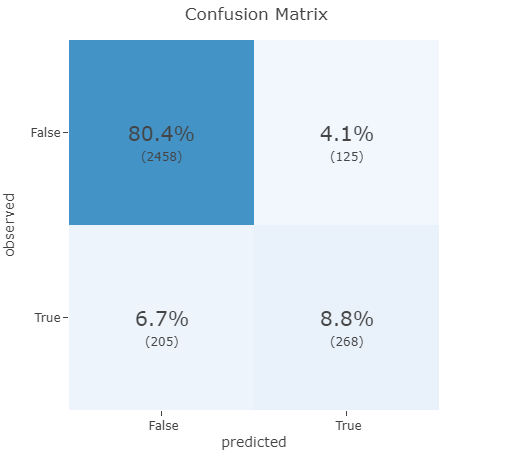птимальные гиперпараметры мы уже находили. Просто впишу их, чтобы долго не переберать

In [71]:
params = {'model__depth' : [7],
          'model__iterations' : [18],
          'model__learning_rate': [0.2],
          'model__random_seed': [42]
          }

CBC = GridSearchCV(pipe, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
CBC.fit(X_train_full, y_train_full)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
0:	learn: 0.4932651	total: 42.2ms	remaining: 718ms
1:	learn: 0.3798389	total: 69.6ms	remaining: 557ms
2:	learn: 0.3112363	total: 92ms	remaining: 460ms
3:	learn: 0.2793412	total: 109ms	remaining: 382ms
4:	learn: 0.2607586	total: 161ms	remaining: 419ms
5:	learn: 0.2458716	total: 205ms	remaining: 411ms
6:	learn: 0.2364807	total: 217ms	remaining: 340ms
7:	learn: 0.2283254	total: 267ms	remaining: 334ms
8:	learn: 0.2240335	total: 285ms	remaining: 285ms
9:	learn: 0.2195820	total: 319ms	remaining: 255ms
10:	learn: 0.2178031	total: 346ms	remaining: 220ms
11:	learn: 0.2151564	total: 377ms	remaining: 188ms
12:	learn: 0.2110443	total: 408ms	remaining: 157ms
13:	learn: 0.2096245	total: 437ms	remaining: 125ms
14:	learn: 0.2076774	total: 488ms	remaining: 97.6ms
15:	learn: 0.2060402	total: 497ms	remaining: 62.2ms
16:	learn: 0.2038118	total: 527ms	remaining: 31ms
17:	learn: 0.2027569	total: 549ms	remaining: 0us


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['VisitorType',
                                                                          'months']),
                                                                        ('scaling',
                                                                         MinMaxScaler(),
                                                                         ['Administrative',
                                                                          'Administrative_Duration',
                                                                          'Informational',
                                                                          'Informational_Duration',
                                                                          'ProductRelated',
                                                                          'ProductRelated_Duration',
                                                                          'BounceRates',
                                                                          'ExitRates',
                                                                          'PageValues',
                                                                          'SpecialDay',
                                                                          'OperatingSystems',
                                                                          'Browser',
                                                                          'Region',
                                                                          'TrafficType'])])),
                                       ('model',
                                        <catboost.core.CatBoostClassifier object at 0x7e58604cff70>)]),
             n_jobs=-1,
             param_grid={'model__depth': [7], 'model__iterations': [18],
                         'model__learning_rate': [0.2],
                         'model__random_seed': [42]},
             scoring='accuracy', verbose=2)

In [72]:
CBC.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['VisitorType', 'months']),
                                                 ('scaling', MinMaxScaler(),
                                                  ['Administrative',
                                                   'Administrative_Duration',
                                                   'Informational',
                                                   'Informational_Duration',
                                                   'ProductRelated',
                                                   'ProductRelated_Duration',
                                                   'BounceRates', 'ExitRates',
                                                   'PageValues', 'SpecialDay',
                                                   'OperatingSystems',
                                                   'Browser', 'Region',
                                                   'TrafficType'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7e58343c5570>)])

In [73]:
accuracy_score(y_test_full, pred_pipe)

0.893979057591623

# 4.Построение Explainer Dashboard и сохранение файла с ним на GitHub (1 балл)




In [68]:
!pip install explainerdashboard -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.6 MB/s eta 0:00:00


In [69]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [70]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [83]:
explainer = ClassifierExplainer(CBC.best_estimator_, X_test_transformed, y_test_full)

splitting pipeline...
Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [84]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:550: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



  0%|          | 0/3056 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...


In [85]:
db.run()

Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)
Dash app running on:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5.Анализ модели в Explainer Dashboard (выводы пишем в том же Jupyter Notebook):
* какие факторы наиболее важны в среднем для получения прогноза? (1 балл)   
* какие значения метрик получились и что это значит? (1 балл)   
* анализ 2-3 индивидуальных прогнозов с комментарием (1 балл)

1) по графику более важными оказались переменные:

*   PageValues
*   month_Nov
*   BounceRates
*   ExitRates
*   ProductRelated

То есть важными были 'номер страницы посещения сайта' и 'данные месяца ноябрь'

2)
(значения метрик) metric -	Score
* accuracy	0.892
* precision	0.682
* recall	0.567
* f1	0.619
* roc_auc_score	0.921
* pr_auc_score	0.717
* log_loss	0.246

По качеству метрик, можно сказать, что наша модель получилось неплохая, относительно других моделей.

Но точность метрик precision и recall стоило бы улучшить.

Учитывая, что у нас дисбаланс классов полагаться на accuracy не стоит.

Среднее гармоническое между точностью и полнотой (F1) = 0.6 - это лучше, чем 0.5. Но, на мой взгляд, маловато.

Если посмотреть на confusion matrix, то видно 10 % не правильно предсказанных значений

3)

index 1192


Имеет вероятность для предсказания конкретного класса:
* False	63.4 %
* True*	36.6 %

Влияние значимых факторов на предсказание конкретного класса:
* PageValues = +34.08%
* BounceRates = -3.81%
* months_Nov = -2.79%
* ProductRelated_Duration = -1.86%
* ExitRates = -1.52%


index 1738

Имеет вероятность для предсказания конкретного класса:
* False	34.7 %
* True*	65.3 %

Влияние значимых факторов на предсказание конкретного класса:
* PageValues = +51.86%
* BounceRates = -4.24%
* ProductRelated  = +2.35%
* ProductRelated_Duration = +1.06%
* ExitRates = +1.8%